### AI-09 Practice 1  

#### Import libraries  

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump

#### Parameters  

In [31]:
csv_in = '../ai-04/ai-04/winequality-red_modified-utf8.txt'

#### Read CSV file  

In [32]:
df = pd.read_csv(csv_in, delimiter='  ', skiprows=13, header=0)
df = df.dropna().reset_index(drop=True)
print(df.shape)
display(df.head())

(1596, 12)
<ipython-input-32-beb88d11d329>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_in, delimiter='  ', skiprows=13, header=0)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


#### Get X and y  

In [33]:
X = df.loc[:, 'fixed_acidity':'alcohol']  # explanatory variables
y = df['quality']  # objective variable
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (1596, 11)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


y: (1596,)
0    5
1    5
2    5
3    5
4    7
Name: quality, dtype: int64


#### Split X and y for train and test  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)
print(X_train.head())

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
433             8.0             0.670         0.30             2.0      0.060   
1477            5.6             0.620         0.03             1.5      0.080   
564             8.7             0.700         0.24             2.5      0.226   
925             8.6             0.470         0.27             2.3      0.055   
1499            7.3             0.585         0.18             2.4      0.078   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
433                  38.0                  62.0  0.99580  3.26       0.56   
1477                  6.0                  13.0  0.99498  3.66       0.62   
564                   5.0                  15.0  0.99910  3.32       0.60   
925                  14.0                  28.0  0.99516  3.18       0.80   
1499                 15.0                  60.0  0.99638  3.31       0.54   

      alcohol  
433      10.2  
1477     10.1  
56

#### Scaling  

In [35]:
sc = MinMaxScaler(feature_range=(0, 1), copy=True)
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#### Parameters for SVR  

In [36]:
C = 50.0
gamma = 0.1
epsilon = 0.05

#### Execute SVR  

In [37]:
svr = SVR(gamma=gamma, C=C, epsilon=epsilon)
svr.fit(X_train_std, y_train)

SVR(C=50.0, epsilon=0.05, gamma=0.1)

#### Do prediction using train data  

In [38]:
y_train_pred = svr.predict(X_train_std)

#### Scaling of Test data and do prediction  

In [39]:
X_test_std = sc.transform(X_test)
y_test_pred = svr.predict(X_test_std)

#### Check MSE  

In [40]:
mse_train = mean_squared_error(y_train_pred, y_train)
print('MSE (train):', mse_train)
mse_test = mean_squared_error(y_test_pred, y_test)
print('MSE (test):', mse_test)

MSE (train): 0.38197350477406516
MSE (test): 0.43131377319091674


**Ans. 0.478**  

#### Scatter plot of output of SVR (prediction) and true value for train / test data  

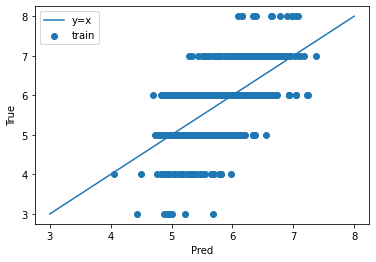

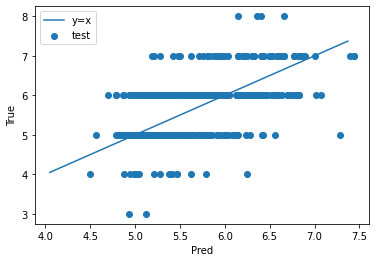

In [41]:
plt.scatter(y_train_pred, y_train, label='train')
xmin = np.array([y_train.min(), y_train.max()])
xmax = np.array([y_train.min(), y_train.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

plt.scatter(y_test_pred, y_test, label='test')
xmin = np.array([y_train_pred.min(), y_train_pred.max()])
xmax = np.array([y_train_pred.min(), y_train_pred.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

#### Save developed SVR model  

In [42]:
tag = 'ai-09-practice1'
sc_file = 'sc_{}.joblib'.format(tag)
dump(sc, sc_file)
model_file = 'svr_{}.joblib'.format(tag)
dump(svr, model_file)

['svr_ai-09-practice1.joblib']

In [43]:
print(y_train_pred)
print(y_train)

[5.40018851 5.23300296 4.93217258 ... 5.33535525 5.23839946 6.56256213]
433     6
1477    4
564     6
925     5
1499    5
       ..
742     6
1552    7
74      6
176     5
338     6
Name: quality, Length: 1117, dtype: int64
